In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# **Signals**

In [9]:
from msr.data.download.sleep_edf import load_sleep_edf_raw_tensors_for_split, FS
from msr.data.measurements import SleepEDFMeasurement

data, targets = load_sleep_edf_raw_tensors_for_split("val")
data, targets = data.numpy(), targets.numpy()
sample = data[111]
eeg_0, eeg_1, eog = sample
measurement = SleepEDFMeasurement(eeg_0, eeg_1, eog, FS)

In [14]:
sig = list(measurement.signals.values())[0]
print(f"FS = {sig.fs}\nDuration = {len(eeg_0) / sig.fs}")

FS = 100
Duration = 30.0


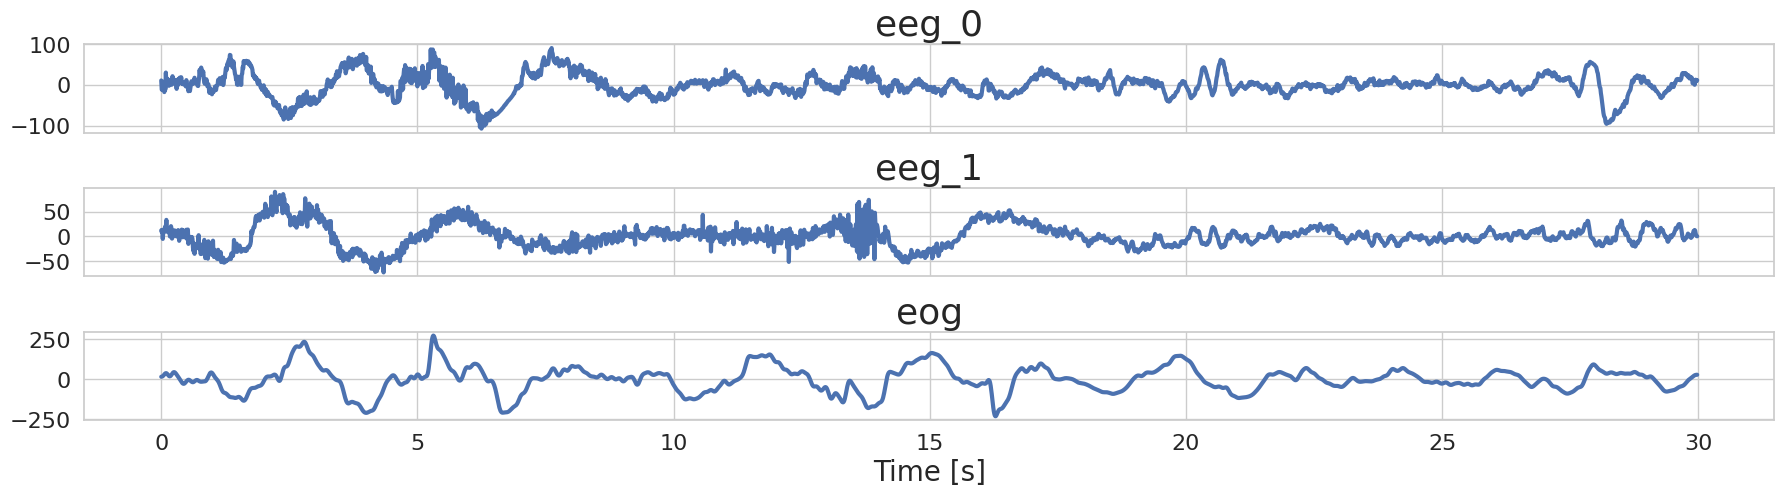

In [4]:
figs = {
    "sleep_edf_signals": measurement.plot(0, -1),
}

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

# **Statistics**

In [12]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datamodules import SleepEDFDataModule

dm = SleepEDFDataModule("whole_signal_features")
dm.setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
counts = {class_name: 0 for class_name in dm.class_names}

for class_name in dm.class_names:
    for ds in [dm.train, dm.val, dm.test]:
        counts[class_name] += ds.classes_counts[class_name]

In [20]:
counts

{'Sleep stage 1': 21522,
 'Sleep stage 2': 69132,
 'Sleep stage 3': 8793,
 'Sleep stage 4': 4246,
 'Sleep stage R': 25835,
 'Sleep stage W': 66822}

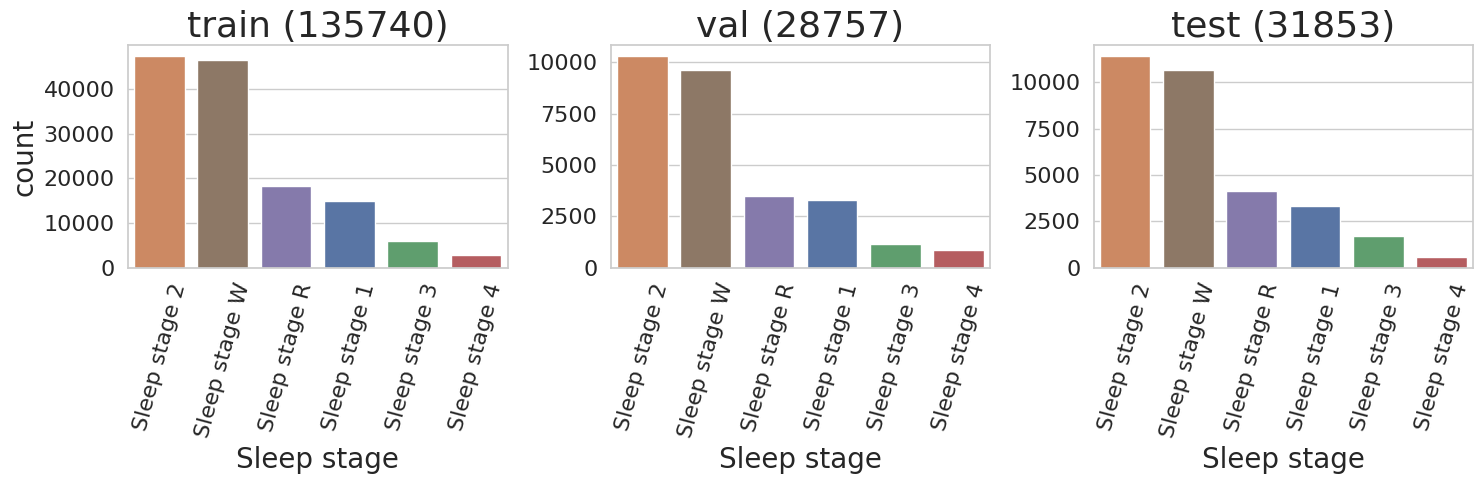

In [15]:
figs = {
    "sleep_edf_statistics": dm.plot_targets(),
}

In [16]:
for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

In [18]:
sum(list(dm.train.classes_counts.values()))

135740